<a href="https://colab.research.google.com/github/foryoudrizzle14/AI-/blob/main/4%EC%A3%BC%EC%B0%A8_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)


다음 기기로 학습합니다: cuda


In [ ]:


# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 텐서로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

In [ ]:
# 데이터 로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
model = nn.Sequential(
        nn.Linear(4, 50),
        nn.ReLU(),
        nn.Linear(50, 3)

)

In [ ]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 50) # 입력 특성은 4개, 첫 번째 은닉층 노드는 50개
        self.fc2 = nn.Linear(50, 3) # 출력 클래스는 3개

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 과정
epochs = 100
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/100, Loss: 0.1239
Epoch 20/100, Loss: 0.0131
Epoch 30/100, Loss: 0.0779
Epoch 40/100, Loss: 0.0310
Epoch 50/100, Loss: 0.0015
Epoch 60/100, Loss: 0.1792
Epoch 70/100, Loss: 0.0005
Epoch 80/100, Loss: 0.0156
Epoch 90/100, Loss: 0.0073
Epoch 100/100, Loss: 0.0001


In [ ]:
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = torch.argmax(outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(predicted)
    print(y_test_tensor)
    print(f'Accuracy: {accuracy:.4f}')

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])
tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0])
Accuracy: 1.0000


In [ ]:
outputs

##Dataset, DataLoader

In [ ]:
X_train_tensor.shape

torch.Size([120, 4])

In [ ]:
y_train_tensor

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
data = [X_train_tensor, y_train_tensor]

In [ ]:
class Iris_Dataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.X = data[0]
    self.y = data[1]

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]



In [ ]:
train_dataset = Iris_Dataset(data)

In [ ]:
train_dataset.__len__()

120

In [ ]:
train_dataset.__getitem__(1)

(tensor([-0.1331,  2.9924, -1.2760, -1.0456]), tensor(0))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)

In [ ]:
[1,2,3]

max

argmax

softmax

# MNIST 오버피팅

적은양의 데이터만 사용하여 오버피팅 재현

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt

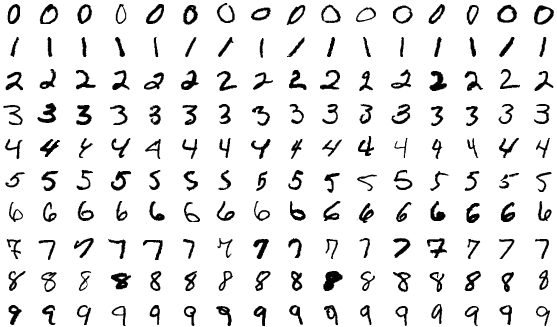

In [ ]:
# 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# MNIST 데이터셋 로드
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4597321.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134325.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1272731.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3675579.54it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_data[0]

In [ ]:
# 트레이닝 샘플 크기를 의도적으로 줄임
num_samples = 100  # 예를 들어 100개의 샘플만 사용
subset_indices = np.random.choice(len(train_data), num_samples, replace=False)
train_subset = Subset(train_data, subset_indices)

# 데이터 로더 설정
train_loader = DataLoader(train_subset, batch_size=10)
test_loader = DataLoader(test_data, batch_size=10)

In [ ]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1) # (1, 28*28)
        return self.layers(x)



In [ ]:
# 모델 초기화
model = DeepNet()

# 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# 학습 함수
def train(model, criterion, optimizer, loader):
    model.train()
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# 평가 함수
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            total_loss += criterion(output, target).item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum().item()
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

def train_test(model, criterion, optimizer, train_loader, test_loader):

  train_losses = []
  test_losses = []
  train_acces = []
  test_acces = []
  # 학습 및 평가
  for epoch in range(50):
      train(model, criterion, optimizer, train_loader)
      train_loss, train_acc = evaluate(model, train_loader)
      test_loss, test_acc = evaluate(model, test_loader)
      train_losses.append(train_loss)
      test_losses.append(test_loss)
      train_acces.append(train_acc)
      test_acces.append(test_acc)
      print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

  return train_losses, test_losses, train_acces, test_acces
